In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
from prophet import Prophet

In [7]:
chicago_df_1 = pd.read_csv("Chicago_Crimes_2001_to_2004.csv", on_bad_lines='skip', low_memory=False)
chicago_df_2 = pd.read_csv("Chicago_Crimes_2005_to_2007.csv", on_bad_lines='skip', low_memory=False)
chicago_df_3 = pd.read_csv("Chicago_Crimes_2008_to_2011.csv", on_bad_lines='skip', low_memory=False)
chicago_df_4 = pd.read_csv("Chicago_Crimes_2012_to_2017.csv", on_bad_lines='skip', low_memory=False)

In [8]:
dataset = pd.concat([chicago_df_1, chicago_df_2, chicago_df_3, chicago_df_4])

In [9]:
dataset.isnull().sum()

Unnamed: 0                   0
ID                           0
Case Number                  7
Date                         0
Block                        0
IUCR                         0
Primary Type                 0
Description                  0
Location Description      1990
Arrest                       0
Domestic                     0
Beat                         0
District                    91
Ward                    700224
Community Area          702091
FBI Code                     0
X Coordinate            105573
Y Coordinate            105573
Year                         0
Updated On                   0
Latitude                105573
Longitude               105574
Location                105574
dtype: int64

In [10]:
dataset.drop(['Unnamed: 0', 'Case Number', 'ID', 'IUCR', 'X Coordinate', 'Y Coordinate', 'Updated On', 'Year', 'FBI Code', 'Beat', 'Ward', 'Community Area', 'Location', 'Latitude', 'Longitude', 'District'], inplace=True, axis=1)

In [12]:
dataset.fillna('UNKNOWN', inplace=True)

In [13]:
dataset.isnull().sum()

Date                    0
Block                   0
Primary Type            0
Description             0
Location Description    0
Arrest                  0
Domestic                0
dtype: int64

In [14]:
dataset.Date = pd.to_datetime(dataset.Date, format='%m/%d/%Y %I:%M:%S %p')
dataset.index = pd.DatetimeIndex(dataset.Date)

In [15]:
dataset_prophet = dataset.resample('M').size().reset_index()
dataset_prophet.columns = ['ds', 'y']

In [16]:
dataset_prophet

,ds,y
0,2001-01-31,74995
1,2001-02-28,66288
2,2001-03-31,53122
3,2001-04-30,40166
4,2001-05-31,41876
...,...,...
188,2016-09-30,23235
189,2016-10-31,23314
190,2016-11-30,21140
191,2016-12-31,19580


In [17]:
p = Prophet()
p.fit(dataset_prophet)

14:54:25 - cmdstanpy - INFO - Chain [1] start processing
14:54:25 - cmdstanpy - INFO - Chain [1] done processing


In [32]:
future = p.make_future_dataframe(periods=1825)
forecast = p.predict(future)
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2001-01-31,40561.402000,24498.638774,55574.245660,40561.402000,40561.402000,-1572.346358,-1572.346358,-1572.346358,-1572.346358,-1572.346358,-1572.346358,0.0,0.0,0.0,38989.055642
1,2001-02-28,40708.663923,17712.719439,49491.476744,40708.663923,40708.663923,-6456.409678,-6456.409678,-6456.409678,-6456.409678,-6456.409678,-6456.409678,0.0,0.0,0.0,34252.254244
2,2001-03-31,40871.703908,23938.454180,54321.573088,40871.703908,40871.703908,-2068.348065,-2068.348065,-2068.348065,-2068.348065,-2068.348065,-2068.348065,0.0,0.0,0.0,38803.355844
3,2001-04-30,41029.484540,20820.967428,54431.036362,41029.484540,41029.484540,-1473.552764,-1473.552764,-1473.552764,-1473.552764,-1473.552764,-1473.552764,0.0,0.0,0.0,39555.931776
4,2001-05-31,41192.524526,28872.061412,61341.431604,41192.524526,41192.524526,3883.957907,3883.957907,3883.957907,3883.957907,3883.957907,3883.957907,0.0,0.0,0.0,45076.482432
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2013,2022-01-26,-11310.355772,-31586.516472,581.161672,-14738.789316,-7181.722406,-4162.928419,-4162.928419,-4162.928419,-4162.928419,-4162.928419,-4162.928419,0.0,0.0,0.0,-15473.284191
2014,2022-01-27,-11324.345368,-30513.090719,2125.498344,-14754.032518,-7192.248362,-3421.157195,-3421.157195,-3421.157195,-3421.157195,-3421.157195,-3421.157195,0.0,0.0,0.0,-14745.502563
2015,2022-01-28,-11338.334965,-28883.133816,2519.122400,-14769.275719,-7202.774318,-2767.634802,-2767.634802,-2767.634802,-2767.634802,-2767.634802,-2767.634802,0.0,0.0,0.0,-14105.969767
2016,2022-01-29,-11352.324561,-29038.464043,3587.069352,-14784.518920,-7213.300273,-2230.266011,-2230.266011,-2230.266011,-2230.266011,-2230.266011,-2230.266011,0.0,0.0,0.0,-13582.590572


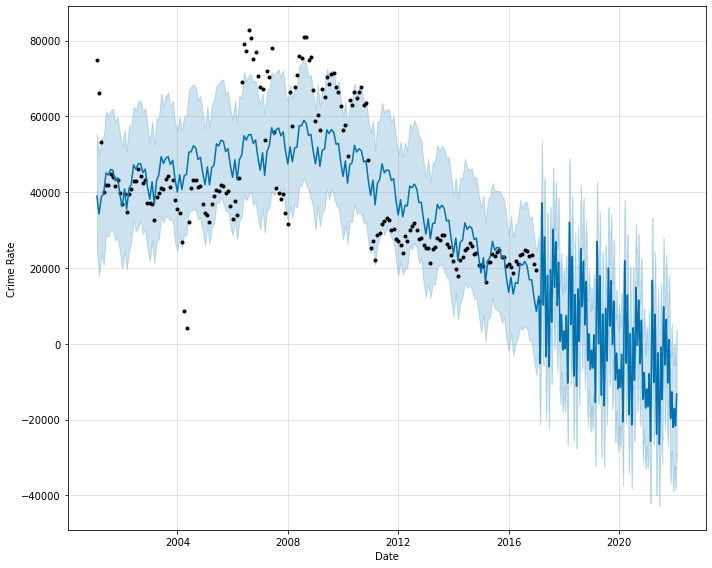

In [35]:
figure = p.plot(forecast, xlabel="Date", ylabel="Crime Rate", figsize=(10,8))

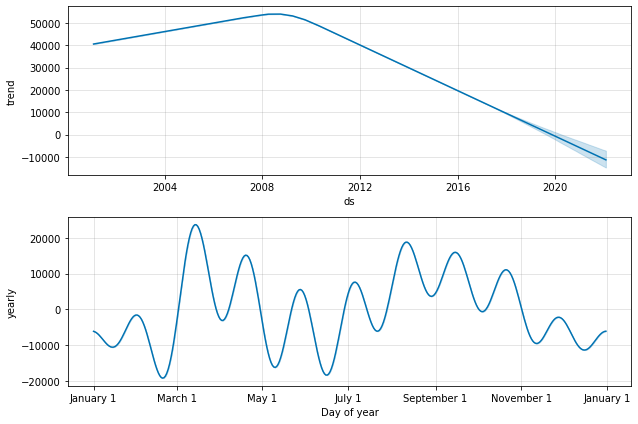

In [34]:
figure = p.plot_components(forecast)